In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

col_title = "Title"
col_abstract = "Abstract"
col_abstract_clean = "Abstract Clean"
col_abstract_lemma = "Abstract Lemma"
col_publication_year= "Publication Year"
col_num_author = "Number of Authors"
col_geographic_term = "Geographic Term"
col_publisher= "Publisher"
col_published_on = "Published On"
col_conference = "Conference"
col_conference_location = "Conference Location"
col_volume = "Volume"
col_issue = "Issue"
col_type = "Type"
col_topic = "Topic"
col_topic_all = "Topic All"
col_geo_clean = col_geographic_term+"clean"
col_geo_sanitized = "Geographic term Sanitized"
col_country_sanitize = "Sanitize"
col_state_sanitize = "Sanitize State"

In [2]:
table = pd.read_pickle('files/6.2 single_country_all_topics.pkl')

In [3]:
table.head()

,Sanitize,Count Weight,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
0,Argentina,1.0,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165,0.102213,0.000165,...,0.000165,0.000165,0.014040,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165,0.000165
1,Australia,1.0,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,...,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.000465,0.049262
2,Australia,1.0,0.000128,0.084032,0.000128,0.000128,0.066768,0.080266,0.000128,0.000128,...,0.000128,0.000128,0.000128,0.000128,0.000128,0.019083,0.000128,0.000128,0.000128,0.000128
3,Australia,1.0,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,...,0.000149,0.000149,0.000149,0.000149,0.000149,0.061865,0.000149,0.000149,0.020329,0.000149
4,Australia,1.0,0.000227,0.000227,0.000227,0.024152,0.031005,0.000227,0.000227,0.000227,...,0.000227,0.000227,0.000227,0.000227,0.000227,0.115871,0.000227,0.000227,0.000227,0.000227


In [4]:
sum_by_group = table.groupby([col_country_sanitize])[["Topic "+str(x) for x in range(50)]].sum()

In [5]:
sum_by_group

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
Sanitize,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.441427,0.202955,0.042366,0.008791,0.026165,0.001766,0.017139,0.001766,0.052521,0.001766,...,0.400997,0.001766,0.596708,0.074593,0.082674,0.167624,0.008523,0.001766,0.246124,0.257638
Albania,0.035208,0.001607,0.013526,0.037596,0.001607,0.079897,0.046873,0.004127,0.439186,0.001607,...,0.372281,0.595507,0.539607,0.028816,0.457036,0.001607,0.109414,0.001607,0.205079,0.429921
Algeria,0.052658,0.216696,0.876414,0.118908,0.137330,0.074434,0.254355,0.067052,0.242018,0.043878,...,0.142706,0.011216,0.493041,0.003780,0.227215,0.162349,0.732528,0.814026,0.116799,1.047120
Andorra,0.000479,0.000479,0.000479,0.004723,0.000479,0.000479,0.449405,0.000479,0.049766,0.000479,...,0.243389,0.000479,0.005794,0.000479,0.090118,0.013421,0.000479,0.049351,0.005800,0.185096
Angola,0.003742,0.003742,0.003742,0.052131,0.003742,0.003742,0.003742,0.003742,0.156458,0.003742,...,0.003742,0.003742,0.003742,0.003742,0.154425,0.003742,0.026228,0.017621,0.003742,0.147047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,0.000211,0.000211,0.000211,0.000211,0.000211,0.035030,0.000211,0.000211,0.000211,0.000211,...,0.000211,0.019763,0.000211,0.000211,0.000211,0.000211,0.082277,0.014309,0.000211,0.000211
Vietnam,0.523184,0.811459,1.962473,1.093909,0.280152,0.628948,0.602860,0.537624,3.839919,0.980285,...,1.172535,1.940167,6.584411,0.553755,2.772537,2.768145,1.614616,0.154427,1.243174,2.879915
Yemen,0.000607,0.000607,0.000607,0.000607,0.000607,0.020347,0.000607,0.000607,0.000607,0.000607,...,0.000607,0.000607,0.000607,0.000607,0.057903,0.000607,0.000607,0.230079,0.000607,0.000607


In [6]:
sum_by_topic = sum_by_group.sum(axis=0)

In [7]:
prop_topics = sum_by_topic/ sum(sum_by_topic)

In [8]:
df_topic_proportion = pd.DataFrame(prop_topics, columns=["Proportion"])

In [9]:
df_topic_proportion["Topics"] = df_topic_proportion.index

In [10]:
df_topic_proportion

,Proportion,Topics
Topic 0,0.012573,Topic 0
Topic 1,0.009691,Topic 1
Topic 2,0.018486,Topic 2
Topic 3,0.017114,Topic 3
Topic 4,0.005266,Topic 4
Topic 5,0.020842,Topic 5
Topic 6,0.009324,Topic 6
Topic 7,0.010578,Topic 7
Topic 8,0.020249,Topic 8
Topic 9,0.009163,Topic 9


In [11]:
topic_names = pd.read_csv("data/topic_names.csv")

In [12]:
topic_names

,topic,name,name2
0,0,Driving simulation,Driving simulation
1,1,Reinforced concrete,Reinforced concrete
2,2,Bridge,Bridge
3,3,Travel time,Travel time
4,4,Noise,Noise
5,5,Optimization model,Optimization model
6,6,Power and energy,Power and energy
7,7,Sensor for detection,Sensor for detection
8,8,Freight port,Freight port
9,9,Fluid mechanics,Fluid mechanics


In [13]:
df_topic_proportion["topic_name"] = [name+ ": "+"T"+str(i) for i, name in enumerate(topic_names["name"])]
topic_name_mapping = { "Topic "+str(i):topic_names.iloc[i]["name2"] +": T"+str(i)  for i in range(50)}

In [14]:
topic_name_mapping

{'Topic 0': 'Driving simulation: T0',
 'Topic 1': 'Reinforced concrete: T1',
 'Topic 2': 'Bridge: T2',
 'Topic 3': 'Travel time: T3',
 'Topic 4': 'Noise: T4',
 'Topic 5': 'Optimization model: T5',
 'Topic 6': 'Power and energy: T6',
 'Topic 7': 'Sensor for detection: T7',
 'Topic 8': 'Freight port: T8',
 'Topic 9': 'Fluid mechanics: T9',
 'Topic 10': 'Construction project and design: T10',
 'Topic 11': 'Vehicle: T11',
 'Topic 12': 'Road safety: T12',
 'Topic 13': 'Concrete materials: T13',
 'Topic 14': 'Pedestrian: T14',
 'Topic 15': 'Vehicle dynamics: T15',
 'Topic 16': 'Fatigue testing: T16',
 'Topic 17': 'Community and neighborhood: T17',
 'Topic 18': 'Route choice & traffic congestion: T18',
 'Topic 19': 'Signal control: T19',
 'Topic 20': 'Simulation model: T20',
 'Topic 21': 'Transportation planning & mgmt.: T21',
 'Topic 22': 'Model estimation and prediction: T22',
 'Topic 23': 'Traffic accident and injury: T23',
 'Topic 24': 'Crash and collision: T24',
 'Topic 25': 'Pavement: T

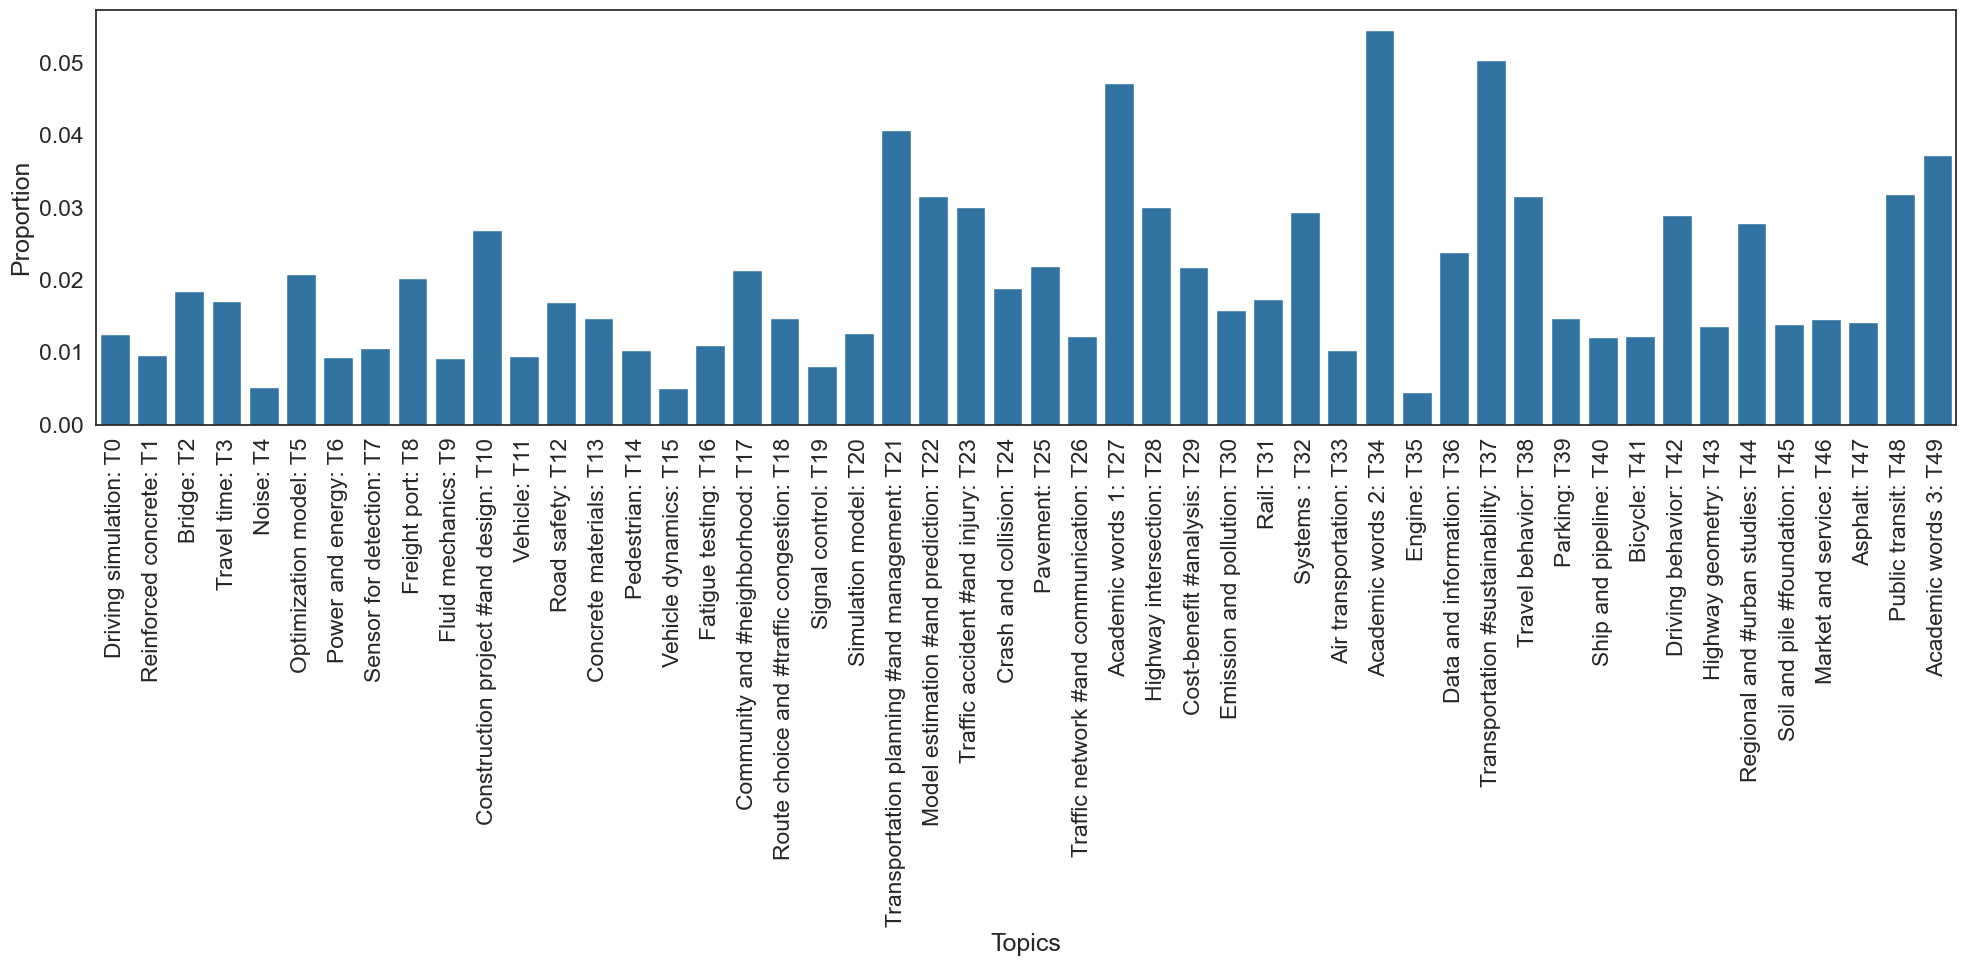

In [16]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")
plt.figure(figsize=(20,10))

ax = sns.barplot(x="topic_name", y="Proportion",  data=df_topic_proportion)
plt.xticks(rotation='vertical')
plt.xlabel("Topics")
plt.tight_layout()
plt.savefig('fig/6.7 topic_proportions.svg', format='svg', dpi=500)
plt.show()

In [17]:
sum_by_group.drop(["Topic 27", "Topic 34", "Topic 49"], axis=1, inplace=True)

In [18]:
sum_by_group['Sum Weight'] = sum_by_group.sum(axis=1)

In [19]:
#sum_by_group.loc["Georgia"]

In [20]:
sorted_top_countries = sum_by_group.sort_values(by = ['Sum Weight'], ascending=False)[:100]
sorted_top_countries.rename(index = {"Korea": "South Korea"}, 
                                 inplace = True)


In [21]:
sorted_top_countries.index.rename("Country", inplace = True)
sorted_top_countries.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Sum Weight
Country,,,,,,,,,,,,,,,,,,,,,
United States,197.396475,223.020355,458.026592,329.584263,90.417092,320.785985,178.291977,184.737531,252.403077,140.738769,...,254.548120,212.119622,378.104410,265.846057,505.060425,317.235990,211.872986,335.370507,1142.773013,15822.511241
China,77.556692,67.360648,106.616156,124.417781,41.285868,281.032581,74.700419,98.066502,255.058237,122.897477,...,102.350814,58.355427,127.325312,105.976351,205.094707,184.025352,77.612101,67.776258,102.999059,5818.335141
Australia,67.177548,42.070300,86.667074,61.806590,15.728799,29.041143,23.415383,26.260952,36.841878,15.824092,...,25.021432,68.989218,251.985533,53.074306,103.405384,30.412918,48.963636,42.656864,46.668184,3395.622382
Canada,28.077896,35.478765,62.939881,58.519073,12.146283,43.048303,20.512011,34.796391,41.711047,33.520205,...,32.318957,84.904039,83.081813,43.590457,117.074763,40.513792,36.318341,113.145730,151.393362,3129.902261
United Kingdom,24.545397,8.418543,20.491899,31.463057,12.592707,21.773680,19.853998,19.367285,24.249551,13.299288,...,17.586233,30.653795,62.556897,18.835532,42.680901,12.004772,36.291983,8.023695,31.519217,1623.900406


In [22]:
sorted_top_countries.to_pickle("files/6.7 top_countries_total_weight.pkl")

In [23]:
table_proportion = sorted_top_countries.div(sorted_top_countries["Sum Weight"], axis=0)

In [24]:
table_proportion.drop("Sum Weight", inplace=True, axis=1)
table_proportion.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48
Country,,,,,,,,,,,,,,,,,,,,,
United States,0.012476,0.014095,0.028948,0.020830,0.005714,0.020274,0.011268,0.011676,0.015952,0.008895,...,0.011549,0.016088,0.013406,0.023897,0.016802,0.031920,0.020050,0.013391,0.021196,0.072225
China,0.013330,0.011577,0.018324,0.021384,0.007096,0.048301,0.012839,0.016855,0.043837,0.021122,...,0.040513,0.017591,0.010030,0.021883,0.018214,0.035250,0.031629,0.013339,0.011649,0.017702
Australia,0.019784,0.012390,0.025523,0.018202,0.004632,0.008553,0.006896,0.007734,0.010850,0.004660,...,0.011029,0.007369,0.020317,0.074209,0.015630,0.030453,0.008957,0.014420,0.012562,0.013744
Canada,0.008971,0.011335,0.020109,0.018697,0.003881,0.013754,0.006554,0.011117,0.013327,0.010710,...,0.015286,0.010326,0.027127,0.026545,0.013927,0.037405,0.012944,0.011604,0.036150,0.048370
United Kingdom,0.015115,0.005184,0.012619,0.019375,0.007755,0.013408,0.012226,0.011926,0.014933,0.008190,...,0.015354,0.010830,0.018877,0.038523,0.011599,0.026283,0.007393,0.022349,0.004941,0.019410


In [24]:
#table_proportion = pd.read_pickle('6.7_table_proportion.pkl')
#table_proportion= table_proportion.iloc[:,:-1]

In [25]:
df_distribution = table_proportion.unstack().reset_index(name='value')
df_distribution.rename(columns={'level_0': 'Topic'}, inplace=True)

# for c in df_distribution["Country"].unique():
#     sum_values = df_distribution.loc[df_distribution["Country"] == c].sum(axis = 0)["value"]
    
#     for index, row in df_distribution.loc[df_distribution["Country"] == c].iterrows():
#         df_distribution.set_value(index, 'proportion', row["value"]/sum_values)
    #print (sum_values)
df_distribution["full_name"] = df_distribution["Topic"].map(topic_name_mapping)

In [26]:
df_distribution

,Topic,Country,value,full_name
0,Topic 0,United States,0.012476,Driving simulation: T0
1,Topic 0,China,0.013330,Driving simulation: T0
2,Topic 0,Australia,0.019784,Driving simulation: T0
3,Topic 0,Canada,0.008971,Driving simulation: T0
4,Topic 0,United Kingdom,0.015115,Driving simulation: T0
...,...,...,...,...
4695,Topic 48,Kazakhstan,0.011390,Public transit: T48
4696,Topic 48,Morocco,0.010824,Public transit: T48
4697,Topic 48,Libya,0.006526,Public transit: T48
4698,Topic 48,Botswana,0.041245,Public transit: T48


In [18]:
#df_distribution.groupby(['Country']).sum()

In [19]:
# sns.set(font_scale=1)

# g = sns.FacetGrid(df_distribution, row="Country" ,height=4, aspect=4, sharex=False)

# g = g.map(plt.bar, "Topic", "value")
# for ax in g.axes.ravel():
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# g.fig.tight_layout()
# g.savefig('fig/Top country distribution.svg', format='svg', dpi=500)

In [20]:
# sns.set(font_scale=1)
# sns.set_style(style="white")
# g = sns.FacetGrid(df_distribution, row="Country" ,height=4, aspect=4, sharex=False)

# g = g.map(plt.bar, "Topic", "proportion")
# for ax in g.axes.ravel():
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# g.fig.tight_layout()
# g.savefig('fig/Top country distribution proportion.svg', format='svg', dpi=500)

In [21]:
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plt.figure(figsize=(20,8))

# xticklabels = ["Topic "+str(i) for i in range(49)]
# ax = sns.lineplot(x="Topic", y="proportion", hue="Country", sort=False,  data=df_distribution)
# plt.xticks(rotation='vertical')
# plt.tight_layout()
# plt.savefig('fig/top country line.svg', format='svg', dpi=500)
# plt.show()

In [22]:
#ax = sorted_top_countries.T.plot(kind="area", figsize = (20,6))

In [27]:
table_proportion.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48
Country,,,,,,,,,,,,,,,,,,,,,
United States,0.012476,0.014095,0.028948,0.020830,0.005714,0.020274,0.011268,0.011676,0.015952,0.008895,...,0.011549,0.016088,0.013406,0.023897,0.016802,0.031920,0.020050,0.013391,0.021196,0.072225
China,0.013330,0.011577,0.018324,0.021384,0.007096,0.048301,0.012839,0.016855,0.043837,0.021122,...,0.040513,0.017591,0.010030,0.021883,0.018214,0.035250,0.031629,0.013339,0.011649,0.017702
Australia,0.019784,0.012390,0.025523,0.018202,0.004632,0.008553,0.006896,0.007734,0.010850,0.004660,...,0.011029,0.007369,0.020317,0.074209,0.015630,0.030453,0.008957,0.014420,0.012562,0.013744
Canada,0.008971,0.011335,0.020109,0.018697,0.003881,0.013754,0.006554,0.011117,0.013327,0.010710,...,0.015286,0.010326,0.027127,0.026545,0.013927,0.037405,0.012944,0.011604,0.036150,0.048370
United Kingdom,0.015115,0.005184,0.012619,0.019375,0.007755,0.013408,0.012226,0.011926,0.014933,0.008190,...,0.015354,0.010830,0.018877,0.038523,0.011599,0.026283,0.007393,0.022349,0.004941,0.019410


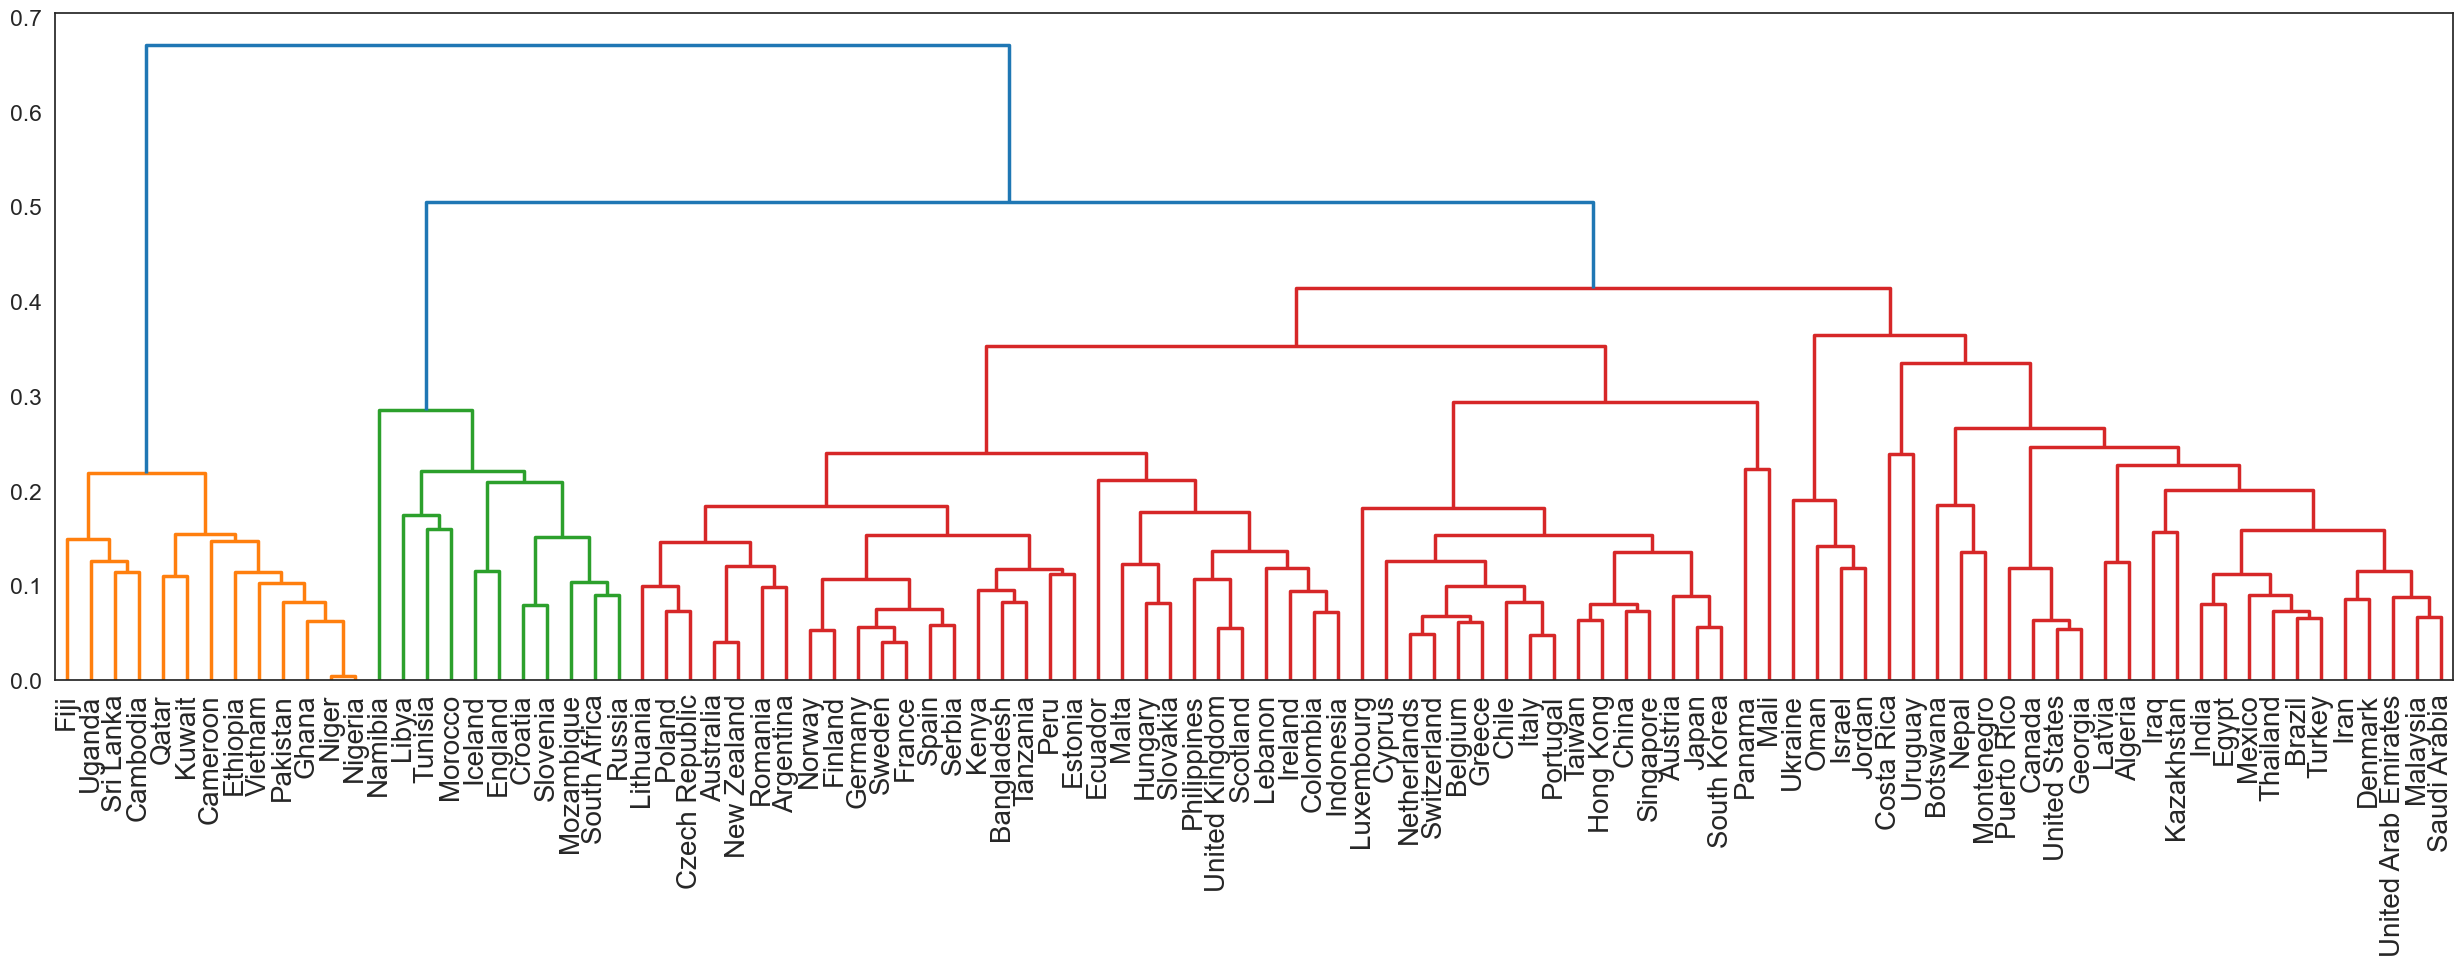

In [28]:
# Calculate the distance between each sample
sns.set_style("white")
A = hierarchy.linkage(table_proportion, 'ward')
fig = plt.figure(figsize=(25, 10))
 
# Plot with Custom leaves
dn = hierarchy.dendrogram(A, leaf_rotation = 90, leaf_font_size = 20,labels = table_proportion.index)
plt.tight_layout()
plt.savefig('fig/6.7 Country dendrogram.pdf', format='pdf', dpi=500)
plt.show()

In [29]:
list(table_proportion.index)

['United States',
 'China',
 'Australia',
 'Canada',
 'United Kingdom',
 'Japan',
 'India',
 'Netherlands',
 'Sweden',
 'Germany',
 'France',
 'New Zealand',
 'Spain',
 'South Korea',
 'Italy',
 'Taiwan',
 'Brazil',
 'South Africa',
 'Norway',
 'Iran',
 'Belgium',
 'Singapore',
 'Turkey',
 'Mexico',
 'Portugal',
 'Greece',
 'Switzerland',
 'Denmark',
 'Ireland',
 'Finland',
 'Croatia',
 'Chile',
 'Malaysia',
 'Thailand',
 'Poland',
 'Hong Kong',
 'Austria',
 'Israel',
 'Colombia',
 'Georgia',
 'Scotland',
 'Lithuania',
 'Serbia',
 'Bangladesh',
 'United Arab Emirates',
 'Indonesia',
 'Russia',
 'Vietnam',
 'Saudi Arabia',
 'Czech Republic',
 'Pakistan',
 'Niger',
 'Egypt',
 'Nigeria',
 'Slovenia',
 'Ghana',
 'Qatar',
 'Hungary',
 'Romania',
 'Argentina',
 'Philippines',
 'Malta',
 'Kenya',
 'Tanzania',
 'Panama',
 'Sri Lanka',
 'Cyprus',
 'Ethiopia',
 'Peru',
 'Puerto Rico',
 'Iceland',
 'Costa Rica',
 'Jordan',
 'Cambodia',
 'Lebanon',
 'Slovakia',
 'Latvia',
 'Estonia',
 'Iraq',
 'Ne

# 2 big clusters and ranking based on number of publication

# Cluster 1: 1. usa 2. China 4. Canada 6. Japan  7. India, 8. netherlands 
# Cluster 2: 3. Australia 5. UK    9. Sweden 10. Germany


# Regional proximity is also reflected in clusters

# Similar country topic distribution

In [29]:
# Canada and United states

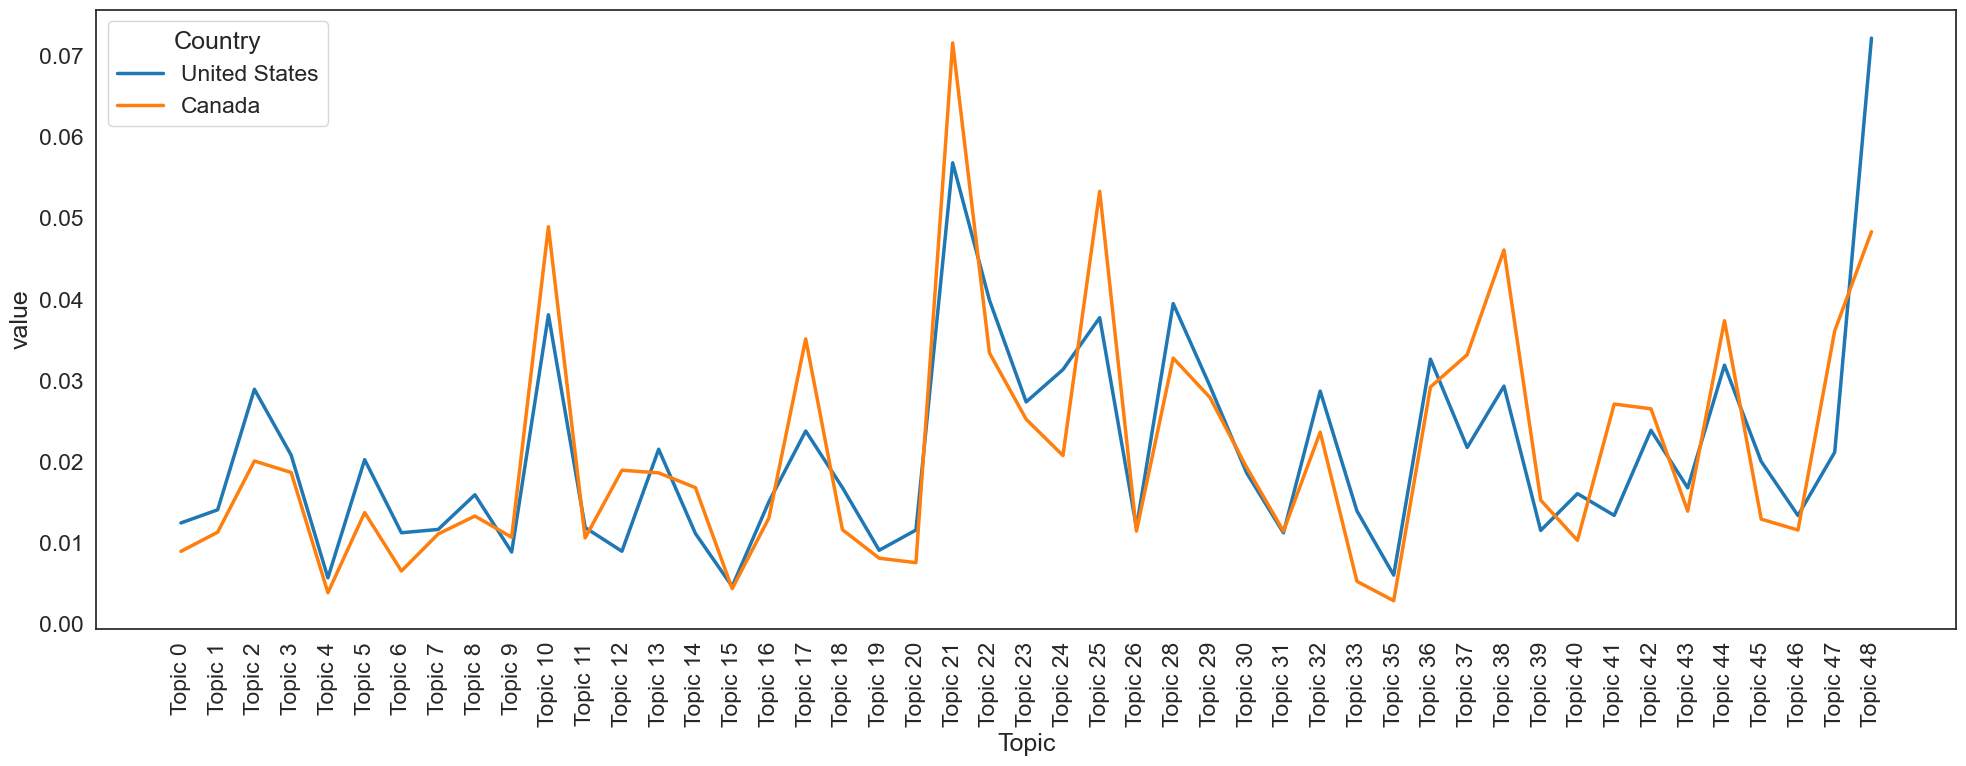

In [30]:
similar1 = df_distribution[df_distribution["Country"].isin(["Canada", "United States"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=similar1)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig('fig/6.7 similar1.pdf', format='pdf', dpi=500)
plt.show()

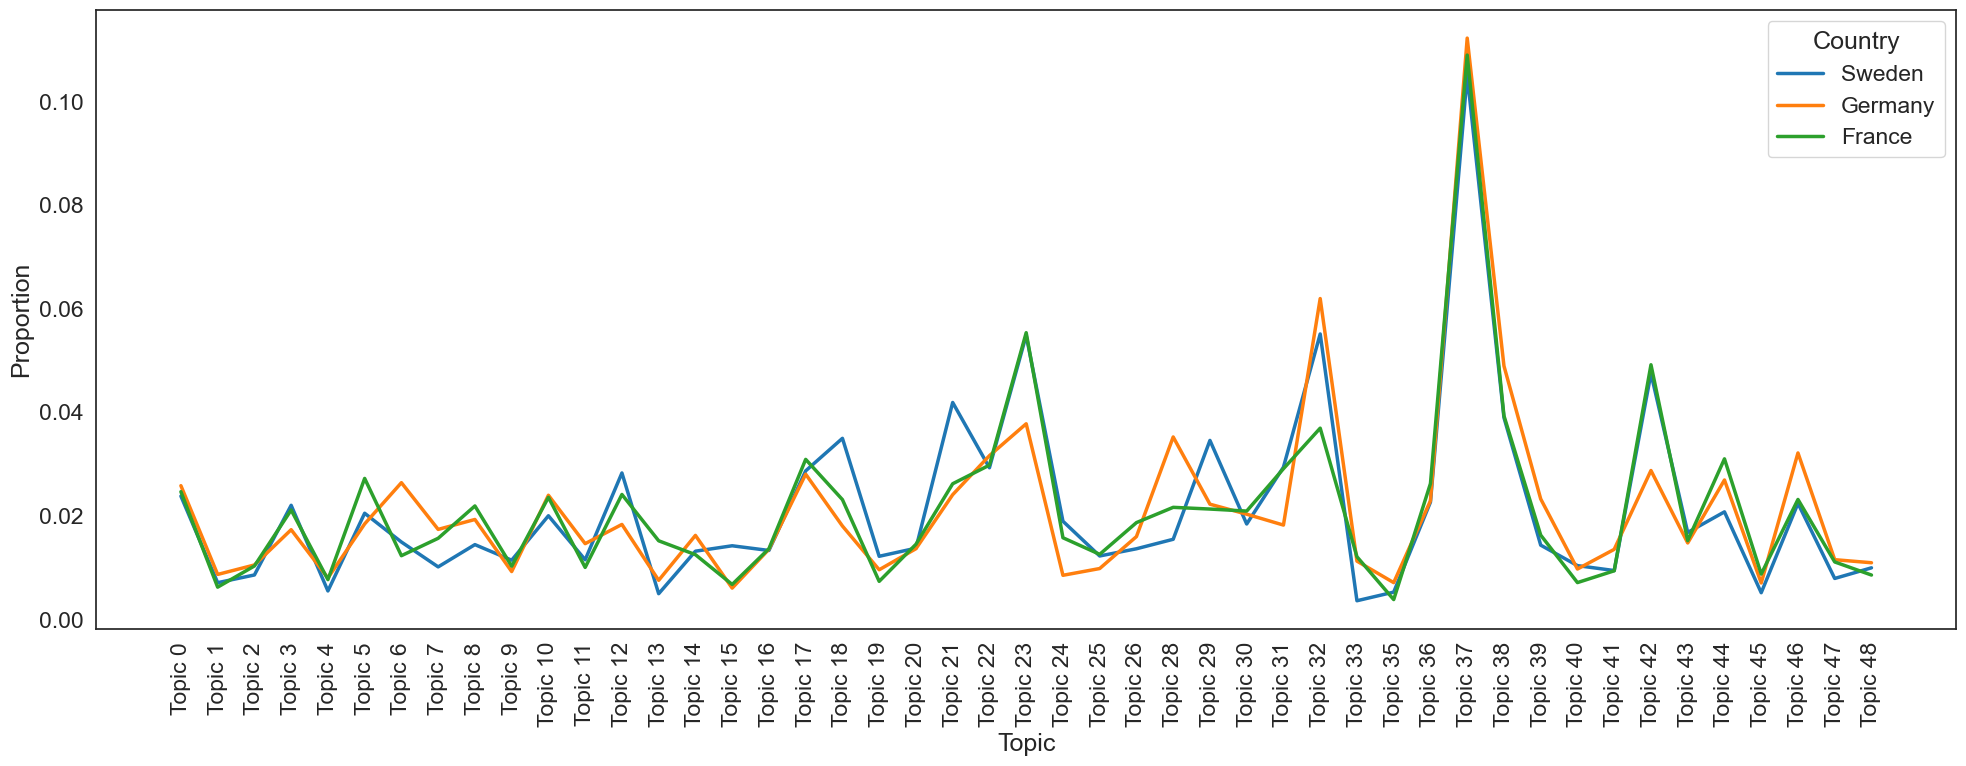

In [31]:
similar3 = df_distribution[df_distribution["Country"].isin([ "Sweden", "Germany", "France"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=similar3)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 similar3.pdf', format='pdf', dpi=500)
plt.show()

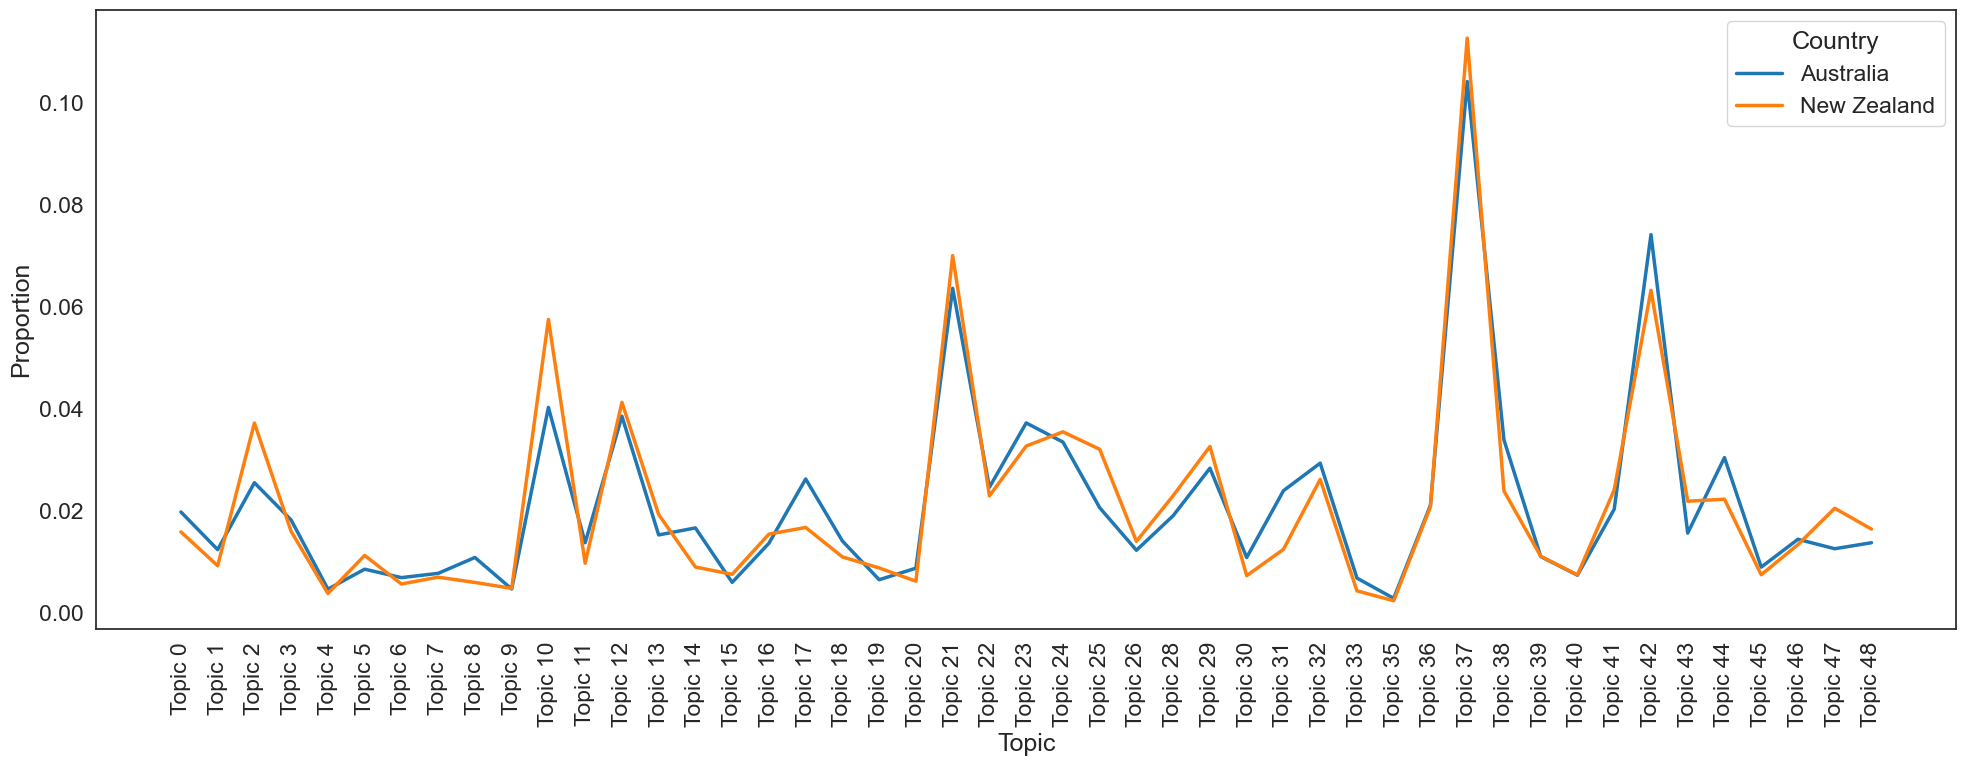

In [32]:
similar4 = df_distribution[df_distribution["Country"].isin(["Australia", "New Zealand"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=similar4)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 similar1.pdf', format='pdf', dpi=500)
plt.show()

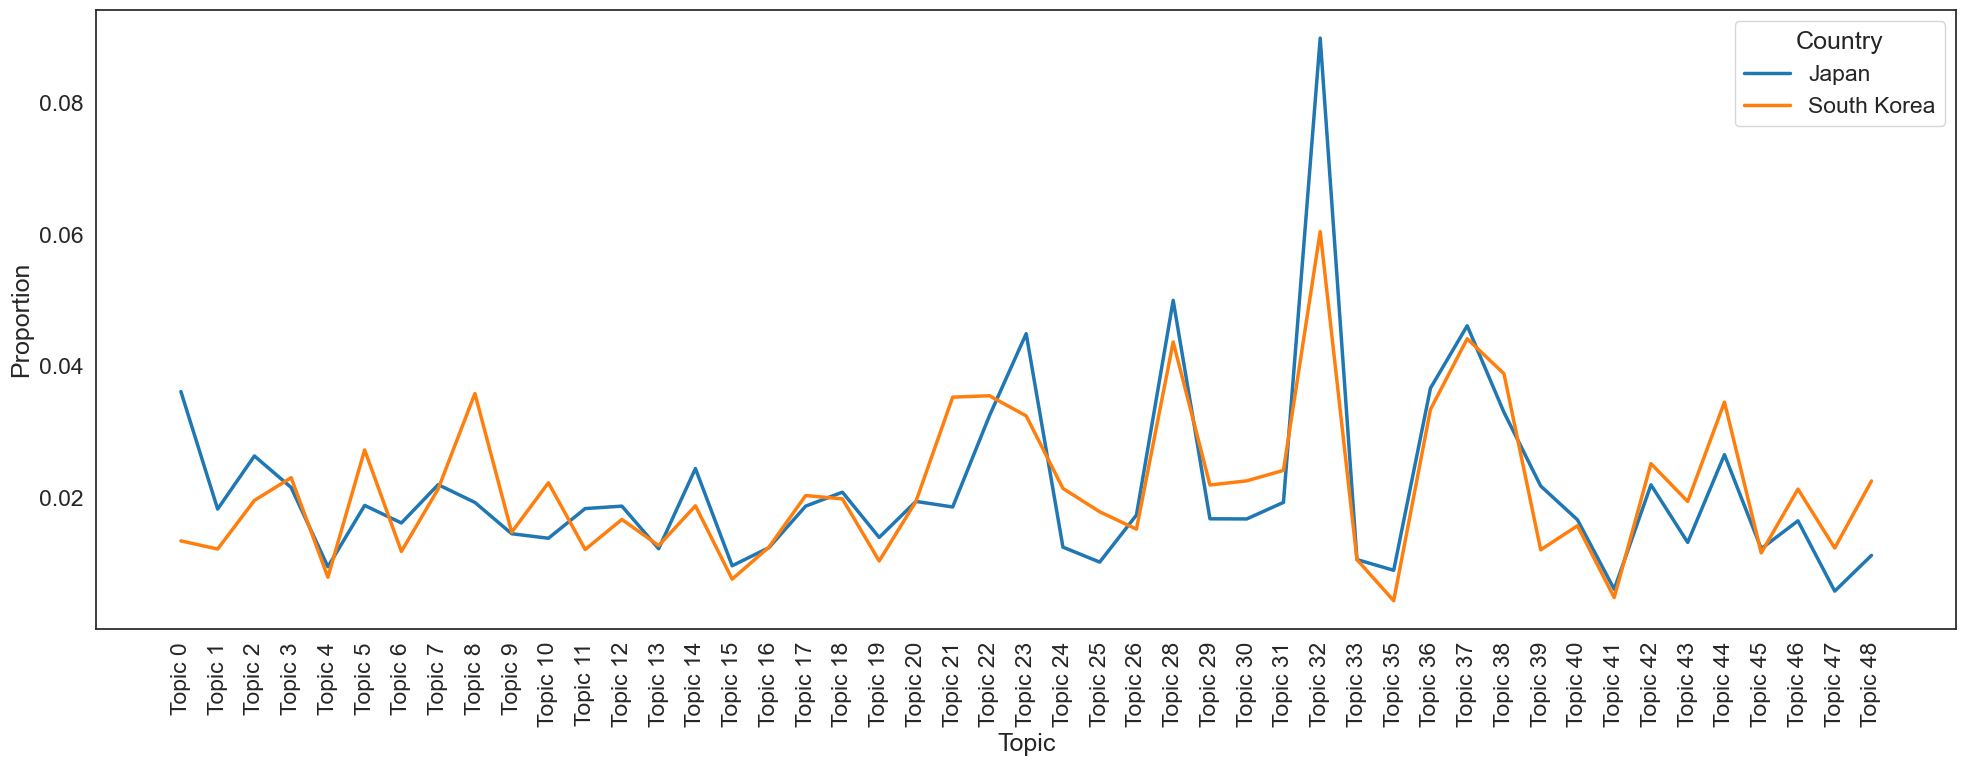

In [33]:
similar2 = df_distribution[df_distribution["Country"].isin(["Japan", "South Korea"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=similar2)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 similar2.pdf', format='pdf', dpi=500)
plt.show()

# Dissimilar country topic distribution

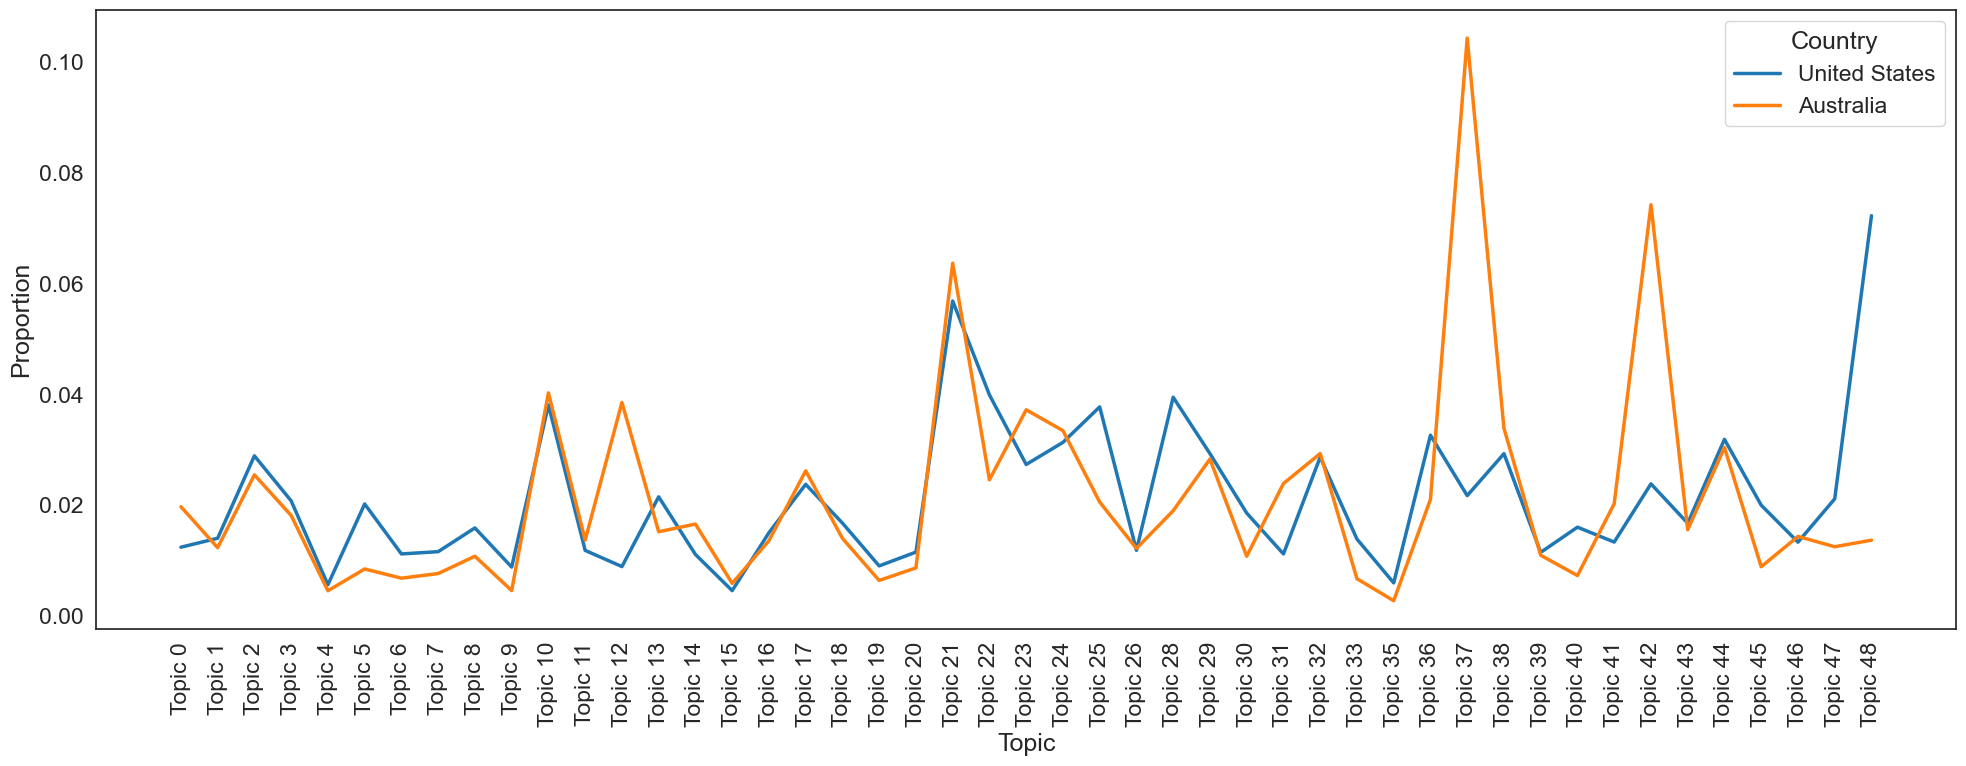

In [34]:
dissimilar1 = df_distribution[df_distribution["Country"].isin(["Australia", "United States"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=dissimilar1)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 dissimilar1.pdf', format='pdf', dpi=500)
plt.show()

# 2

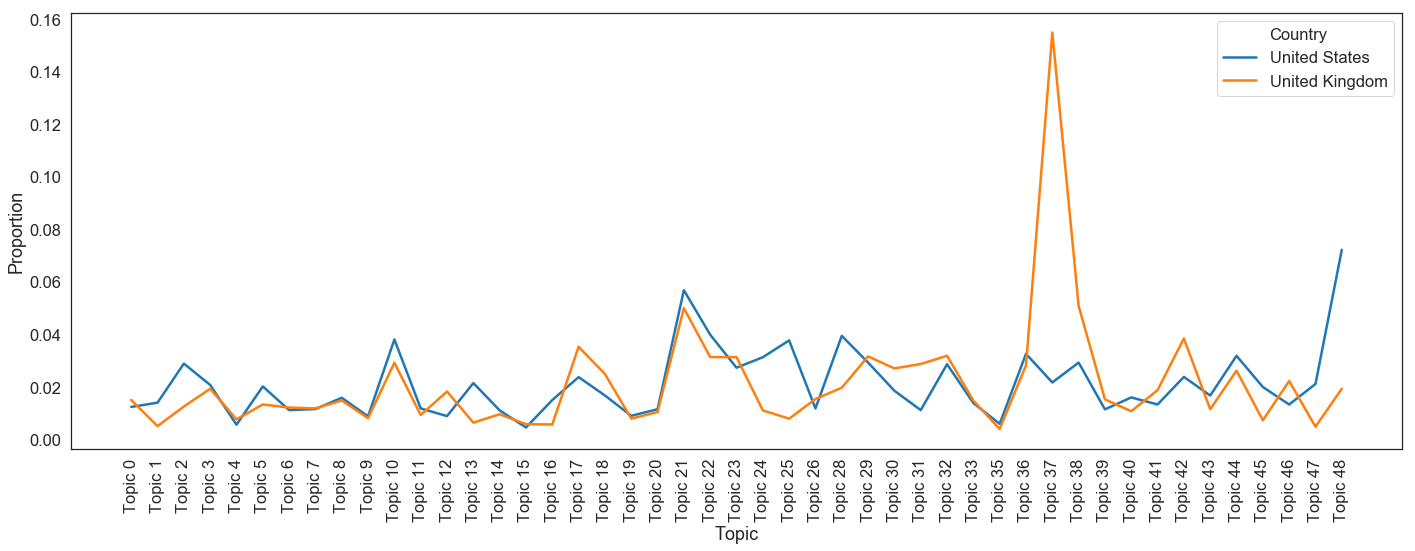

In [32]:
dissimilar2 = df_distribution[df_distribution["Country"].isin(["United Kingdom", "United States"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=dissimilar2)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/dissimilar2.pdf', format='pdf', dpi=500)
plt.show()

# 3

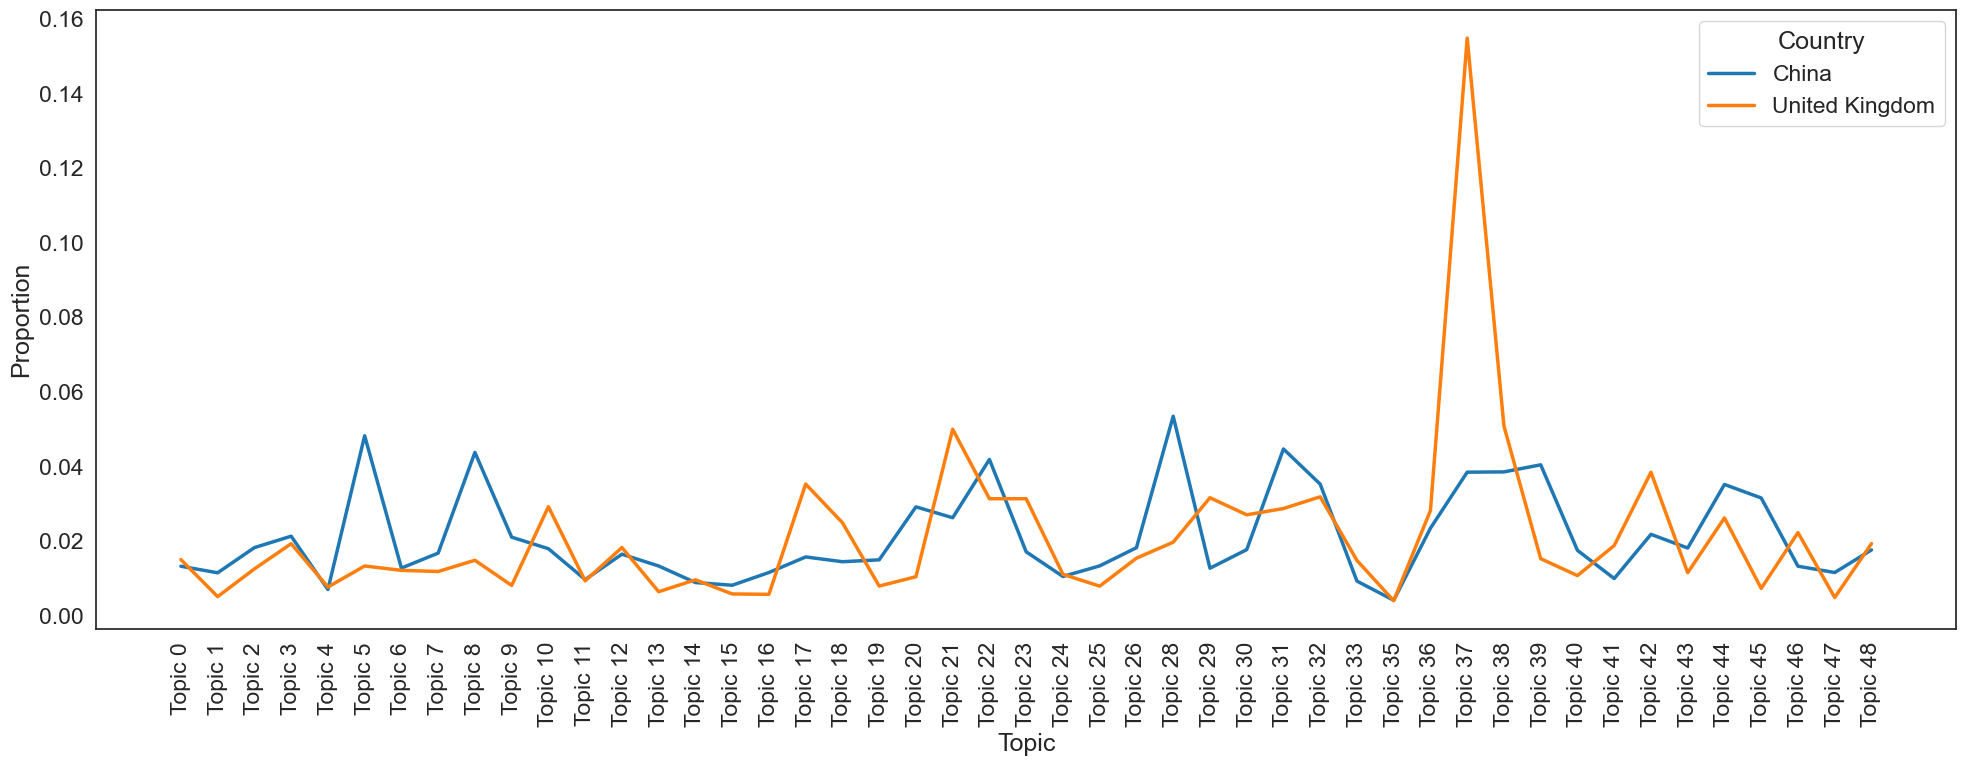

In [35]:
dissimilar3 = df_distribution[df_distribution["Country"].isin(["United Kingdom", "China"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=dissimilar3)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 dissimilar3.pdf', format='pdf', dpi=500)
plt.show()

# 4

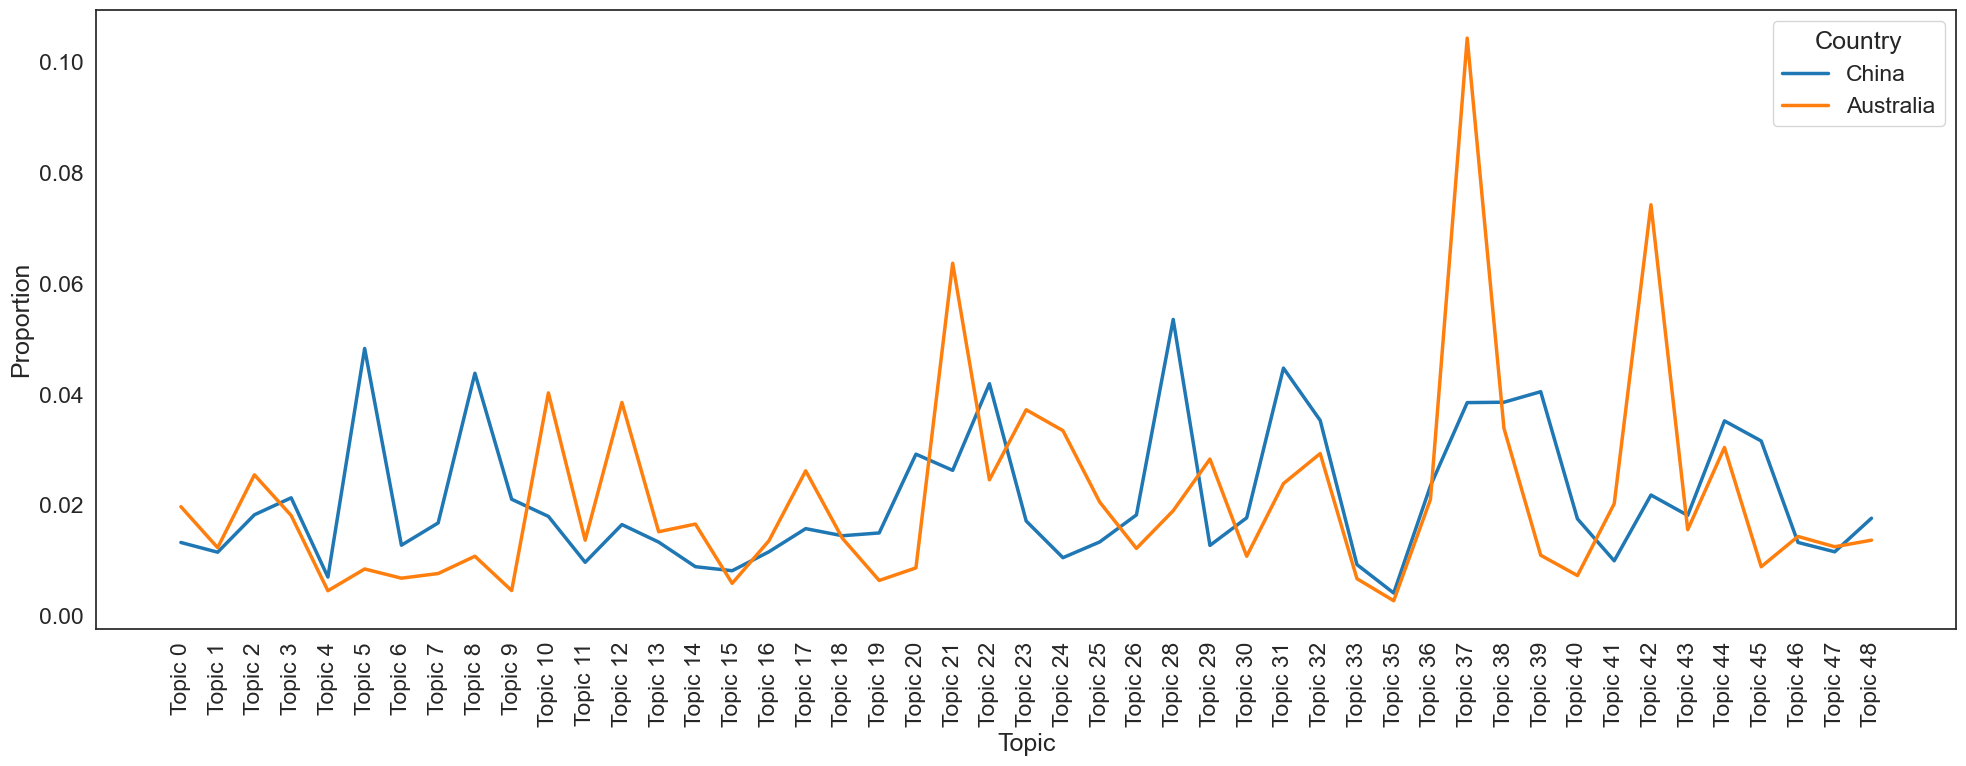

In [36]:
dissimilar4 = df_distribution[df_distribution["Country"].isin(["Australia", "China"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=dissimilar4)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 dissimilar4.pdf', format='pdf', dpi=500)
plt.show()

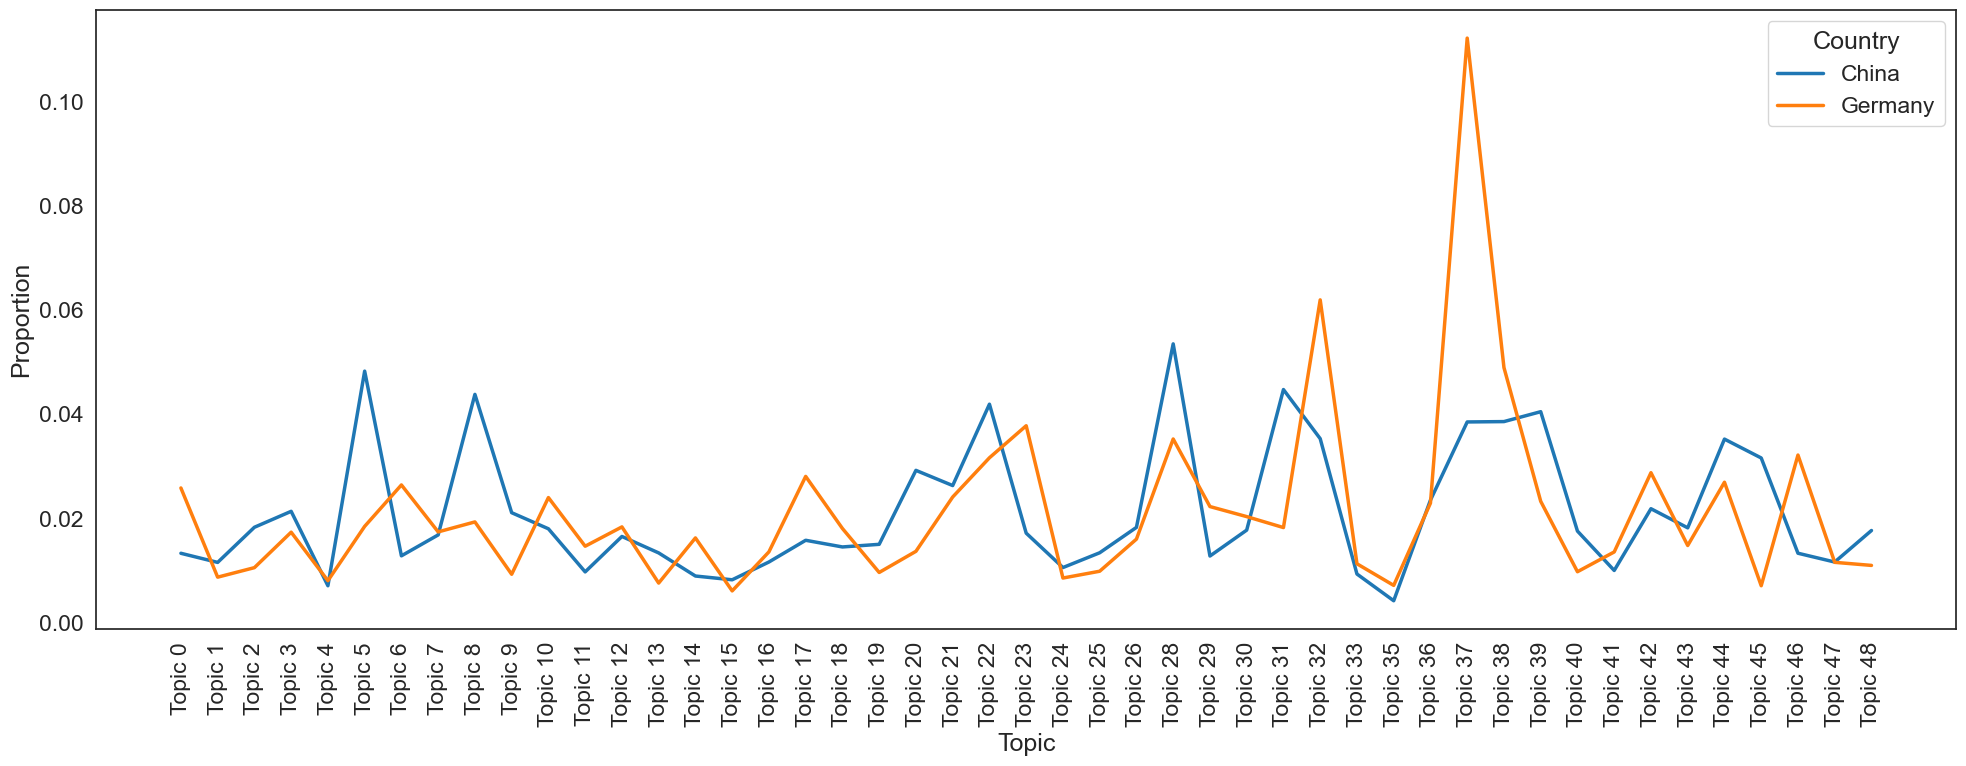

In [37]:
dissimilar5 = df_distribution[df_distribution["Country"].isin(["Germany", "China"])]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,8))

xticklabels = ["Topic "+str(i) for i in range(49)]
ax = sns.lineplot(x="Topic", y="value", hue="Country", sort=False,  data=dissimilar5)
plt.xticks(rotation='vertical')
plt.ylabel("Proportion")
plt.tight_layout()
plt.savefig('fig/6.7 dissimilar5.pdf', format='pdf', dpi=500)
plt.show()

In [38]:
from scipy.spatial.distance import squareform, pdist

In [39]:
sum_table = sum_by_group.T
cols = sum_table.columns[sum_table.columns.str.contains('Topic')]

In [40]:
cols

Index([], dtype='object', name='Sanitize')

In [41]:
# sum_table[cols] = sum_table[cols].div(sum_table[cols].sum(axis=1), axis=0)
# top_country_proportion = sum_table.sort_values(by=["Sum Weight"], ascending=[False])[:50]
# top_country_proportion.drop(["Sum Weight"], axis=1, inplace=True)

In [42]:
# top_country_proportion.to_csv("sum_table.csv")
# top_country_proportion.columns

In [43]:
dist_matrix = pd.DataFrame(squareform(pdist(table_proportion)), columns=table_proportion.index, index = table_proportion.index)

In [44]:
dist_matrix

Country,United States,China,Australia,Canada,United Kingdom,Japan,India,Netherlands,Sweden,Germany,...,Mali,Tunisia,Ecuador,Fiji,Ukraine,Kazakhstan,Morocco,Libya,Botswana,Uruguay
Country,,,,,,,,,,,,,,,,,,,,,
United States,0.000000,0.105485,0.126052,0.054290,0.158636,0.117731,0.099171,0.130819,0.133802,0.135786,...,0.188386,0.233941,0.181085,0.215488,0.223269,0.172148,0.272219,0.265853,0.164857,0.221494
China,0.105485,0.000000,0.135007,0.114940,0.147668,0.092114,0.091477,0.097031,0.120329,0.109992,...,0.196715,0.217800,0.167165,0.238008,0.209714,0.184963,0.244669,0.248772,0.186677,0.226028
Australia,0.126052,0.135007,0.000000,0.110487,0.083651,0.129664,0.099795,0.098629,0.069451,0.092356,...,0.204699,0.175050,0.166975,0.183948,0.162983,0.151052,0.216236,0.203236,0.152184,0.235579
Canada,0.054290,0.114940,0.110487,0.000000,0.146704,0.128858,0.093787,0.118541,0.127423,0.130354,...,0.200813,0.229668,0.170655,0.215516,0.223474,0.161976,0.271069,0.257578,0.158655,0.214223
United Kingdom,0.158636,0.147668,0.083651,0.146704,0.000000,0.144294,0.107683,0.087917,0.071682,0.071283,...,0.213030,0.139610,0.175097,0.225666,0.189756,0.179553,0.166894,0.184819,0.166407,0.248964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kazakhstan,0.172148,0.184963,0.151052,0.161976,0.179553,0.174508,0.159601,0.187113,0.152249,0.166431,...,0.237604,0.222661,0.213436,0.180866,0.209749,0.000000,0.256561,0.250623,0.169365,0.260992
Morocco,0.272219,0.244669,0.216236,0.271069,0.166894,0.258005,0.224107,0.223722,0.205901,0.196955,...,0.280660,0.159248,0.251560,0.329499,0.235360,0.256561,0.000000,0.169096,0.257386,0.295687
Libya,0.265853,0.248772,0.203236,0.257578,0.184819,0.266800,0.228195,0.227774,0.214608,0.216023,...,0.276818,0.171978,0.274958,0.309878,0.196211,0.250623,0.169096,0.000000,0.247788,0.318504


In [45]:
dist_matrix.to_pickle("files/6.7 dist_matrix.pkl")

In [46]:
table_proportion.to_pickle("files/6.7_table_proportion.pkl")

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_968\1288511105.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


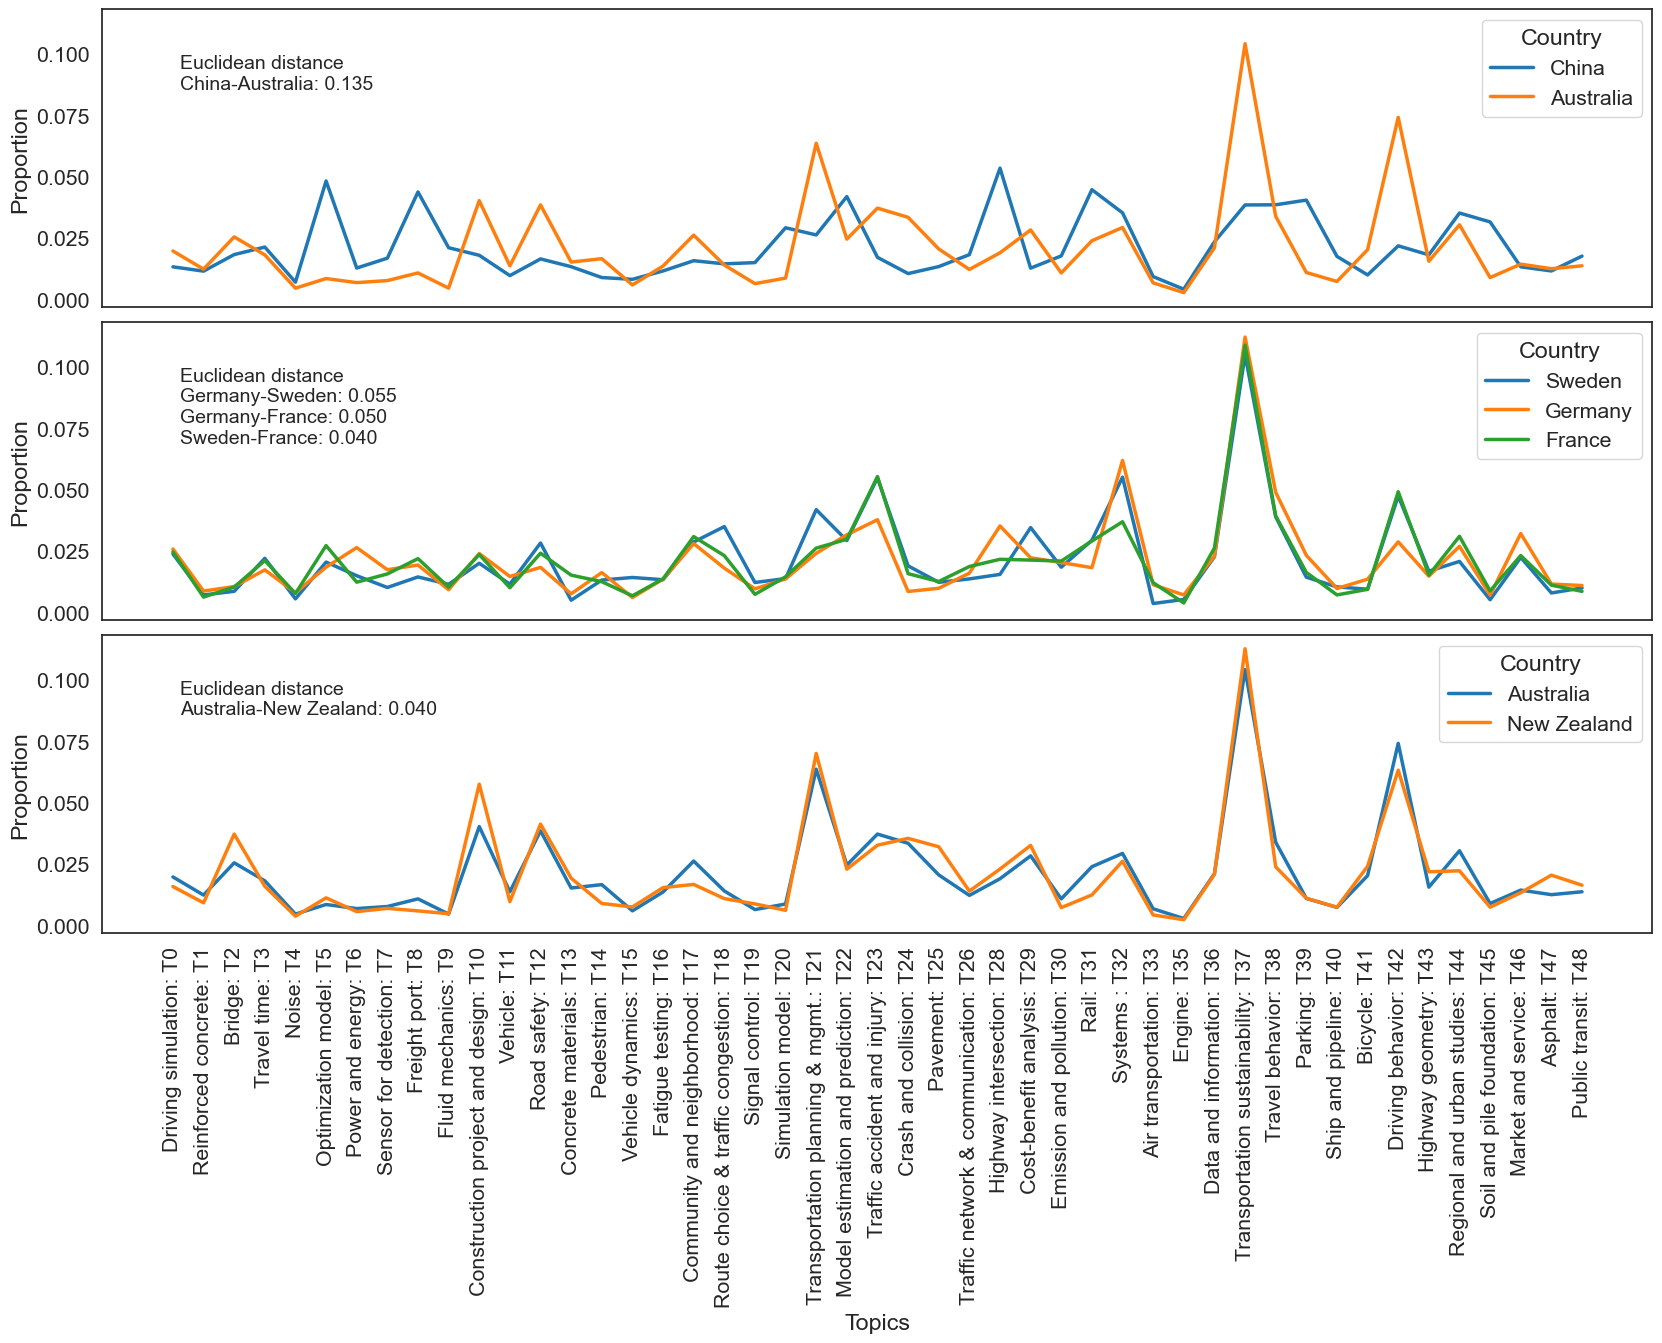

In [47]:
#similar countries combined plot

sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(20,12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.9})
props = dict(boxstyle='round', facecolor='White', alpha=0.5)
countries = [["China", "Australia"], ["Sweden", "Germany", "France"], ["Australia", "New Zealand"]]
texts = ["Euclidean distance \nChina-Australia: 0.135", "Euclidean distance \nGermany-Sweden: 0.055 \nGermany-France: 0.050 \nSweden-France: 0.040", "Euclidean distance \nAustralia-New Zealand: 0.040"]
for i, ax in enumerate(axes.flat):
    
    similar1 = df_distribution[df_distribution["Country"].isin(countries[i])]
    sns.lineplot(x="full_name", y="value", hue="Country", sort=False,  data=similar1, ax=ax)
    ax.text(0.05, 0.85, texts[i], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.xaxis.grid(False)
    ax.set_ylabel("Proportion")
plt.xticks(rotation='vertical')
plt.xlabel("Topics")
fig.tight_layout()
plt.savefig("fig/6.7 combined_similsr_dissimilar_countries.svg", format="svg", bbox_inches = "tight")

C:\Users\Sajeeb\AppData\Local\Temp\ipykernel_968\1847004259.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


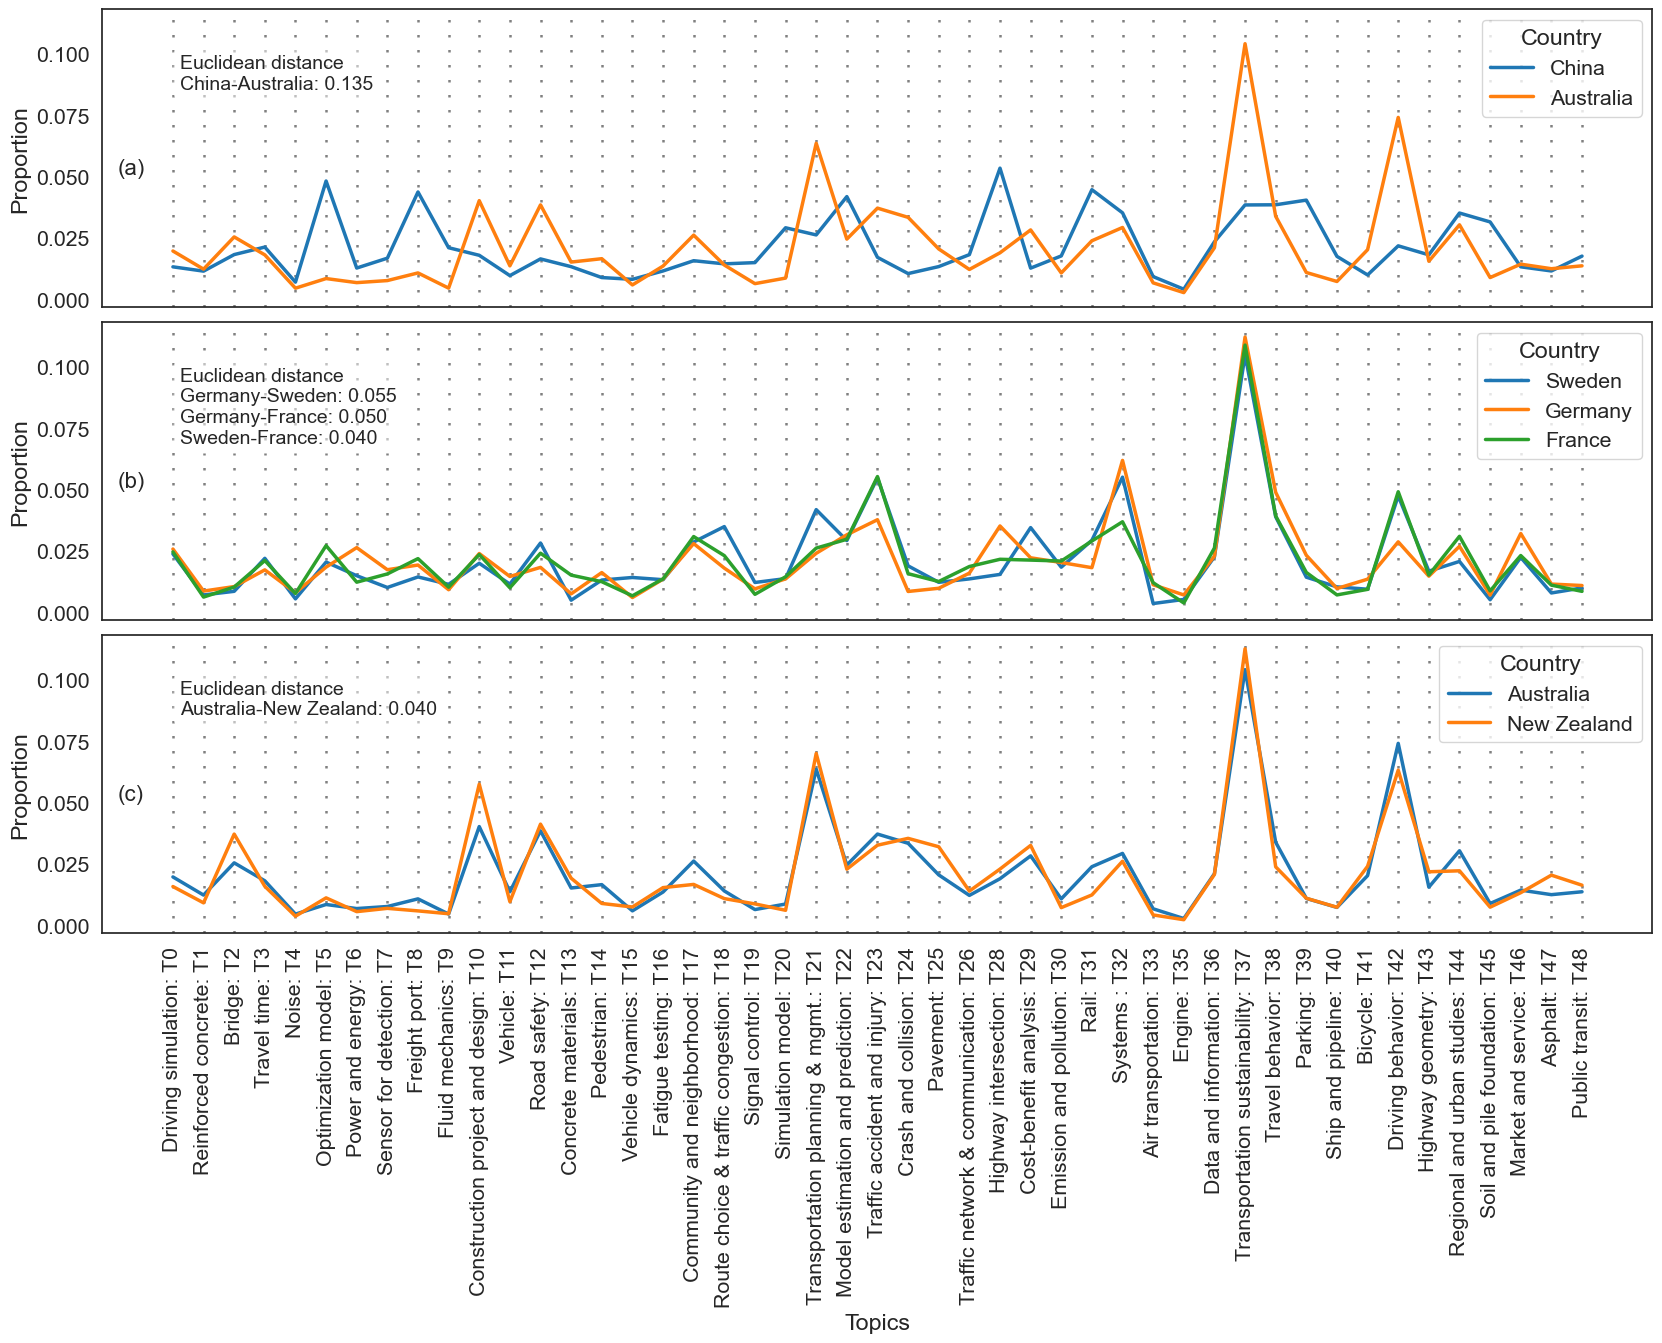

In [48]:
#similar countries combined plot

sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(20,12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace': 0.9})
props = dict(boxstyle='round', facecolor='White', alpha=0.5)
countries = [["China", "Australia"], ["Sweden", "Germany", "France"], ["Australia", "New Zealand"]]
subplot = ["(a)", "(b)", "(c)"]
texts = ["Euclidean distance \nChina-Australia: 0.135", "Euclidean distance \nGermany-Sweden: 0.055 \nGermany-France: 0.050 \nSweden-France: 0.040", "Euclidean distance \nAustralia-New Zealand: 0.040"]
for i, ax in enumerate(axes.flat):
    
    similar1 = df_distribution[df_distribution["Country"].isin(countries[i])]
    sns.lineplot(x="full_name", y="value", hue="Country", sort=False,  data=similar1, ax=ax)
    ax.text(0.05, 0.85, texts[i], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.text(0.01, 0.5, subplot[i], transform=ax.transAxes, fontsize=16,
        verticalalignment='top')
    ax.xaxis.grid(color='grey', linestyle=(0, (1, 5)), linewidth=1.8)
    ax.set_ylabel("Proportion")
plt.xticks(rotation='vertical')
plt.xlabel("Topics")
fig.tight_layout()
plt.savefig("fig/6.7 combined_similar_dissimilar_countries_grid.svg", format="svg", bbox_inches = "tight")